In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [4]:
df = pd.read_excel("~/Downloads/little_lemon.xlsx")

In [5]:
df.head()

,Row Number,Order ID,Order Date,Delivery Date,Customer ID,Customer Name,City,Country,Postal Code,Country Code,...,Sales,Quantity,Discount,Delivery Cost,Course Name,Cuisine Name,Starter Name,Desert Name,Drink,Sides
0,1,54-366-6861,2020-06-15,2020-03-26,72-055-7985,Laney Fadden,Daruoyan,China,993-0031,CN,...,187.5,2,20.00,60.51,Greek salad,Greek,Olives,Greek yoghurt,Athens White wine,Tapas
1,2,63-761-3686,2020-08-25,2020-07-17,65-353-0657,Giacopo Bramich,Ongjin,North Korea,216282,KP,...,352.5,1,15.00,96.75,Bean soup,Italian,Flatbread,Ice cream,Corfu Red Wine,Potato salad
2,3,65-351-6434,2021-08-17,2020-04-24,90-876-6799,Lia Bonar,Quince Mil,Peru,663246,PE,...,112.5,3,10.52,36.37,Pizza,Italian,Minestrone,Cheesecake,Italian Coffee,Bruschetta
3,4,36-917-2834,2021-08-14,2020-04-13,73-873-4827,Merrill Baudon,Susaki,Japan,987-0352,JP,...,330.0,3,11.23,5.49,Carbonara,Turkish,Tomato bread,Affogato,Roma Red wine,Focaccia
4,5,86-114-9232,2020-12-20,2021-02-02,80-927-5246,Tasia Fautly,Tobruk,Libya,351 01,LY,...,480.0,2,51.05,63.64,Kabasa,Greek,Falafel,Turkish yoghurt,Ankara White Wine,Meatballs


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row Number     21000 non-null  int64         
 1   Order ID       21000 non-null  object        
 2   Order Date     21000 non-null  datetime64[ns]
 3   Delivery Date  21000 non-null  datetime64[ns]
 4   Customer ID    21000 non-null  object        
 5   Customer Name  21000 non-null  object        
 6   City           21000 non-null  object        
 7   Country        21000 non-null  object        
 8   Postal Code    21000 non-null  object        
 9   Country Code   20958 non-null  object        
 10   Cost          21000 non-null  float64       
 11  Sales          21000 non-null  float64       
 12  Quantity       21000 non-null  int64         
 13  Discount       21000 non-null  float64       
 14  Delivery Cost  21000 non-null  float64       
 15  Course Name    2100

In [8]:
df["Profit"] = df["Sales"] - df[" Cost"]

# data visualization

In the first task, you need to create a bar chart that shows customers sales and filter data based on sales with at least $70.

In [9]:
df2 = df[df["Sales"] >= 70.00]

In [10]:
task1 = pd.DataFrame(df2.groupby(["Customer Name"])["Sales"].sum())

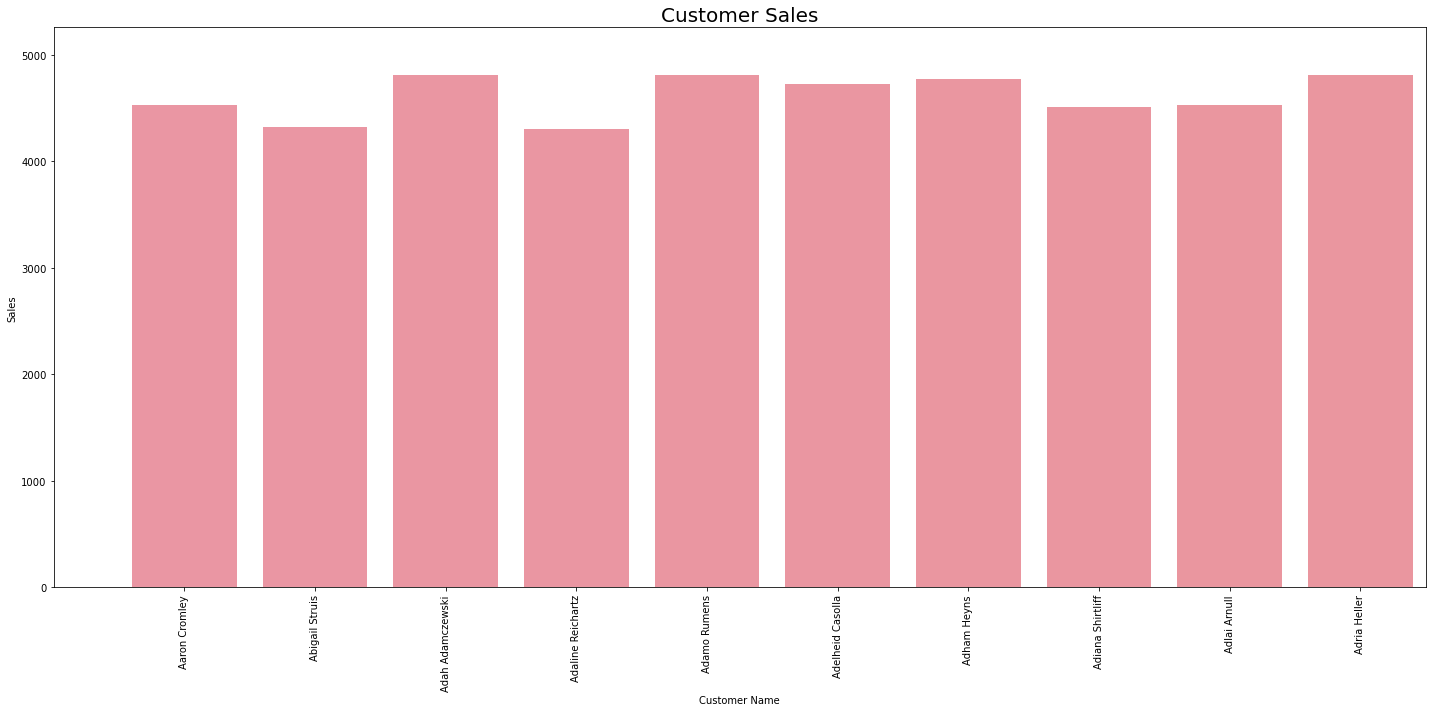

In [11]:
# Sort Barplots by Values and Single Plot

fig = plt.figure(figsize=(20,10))


sns.barplot(x=task1.index, y=task1.Sales, data=task1)
plt.title("Customer Sales", size=20)
plt.xlabel("Customer Name")
#plt.ylabel("Average Ticket Prices")
plt.xticks(rotation=90)
#plt.ticklabel_format(style='plain', axis='y')
plt.xlim(-1, 9.5)
plt.tight_layout()
plt.show()

In the second task, you need to create a line chart to show the sales trend from 2019 to 2022.

In [12]:
df3 = df[df["Order Date"] < "2023-01-01"]

In [13]:
df3["Order Date"].min()

Timestamp('2019-06-14 00:00:00')

In [14]:
df3["Order Date"].max()

Timestamp('2022-12-31 00:00:00')

ConversionError: Failed to convert value(s) to axis units: '2019-06-14'

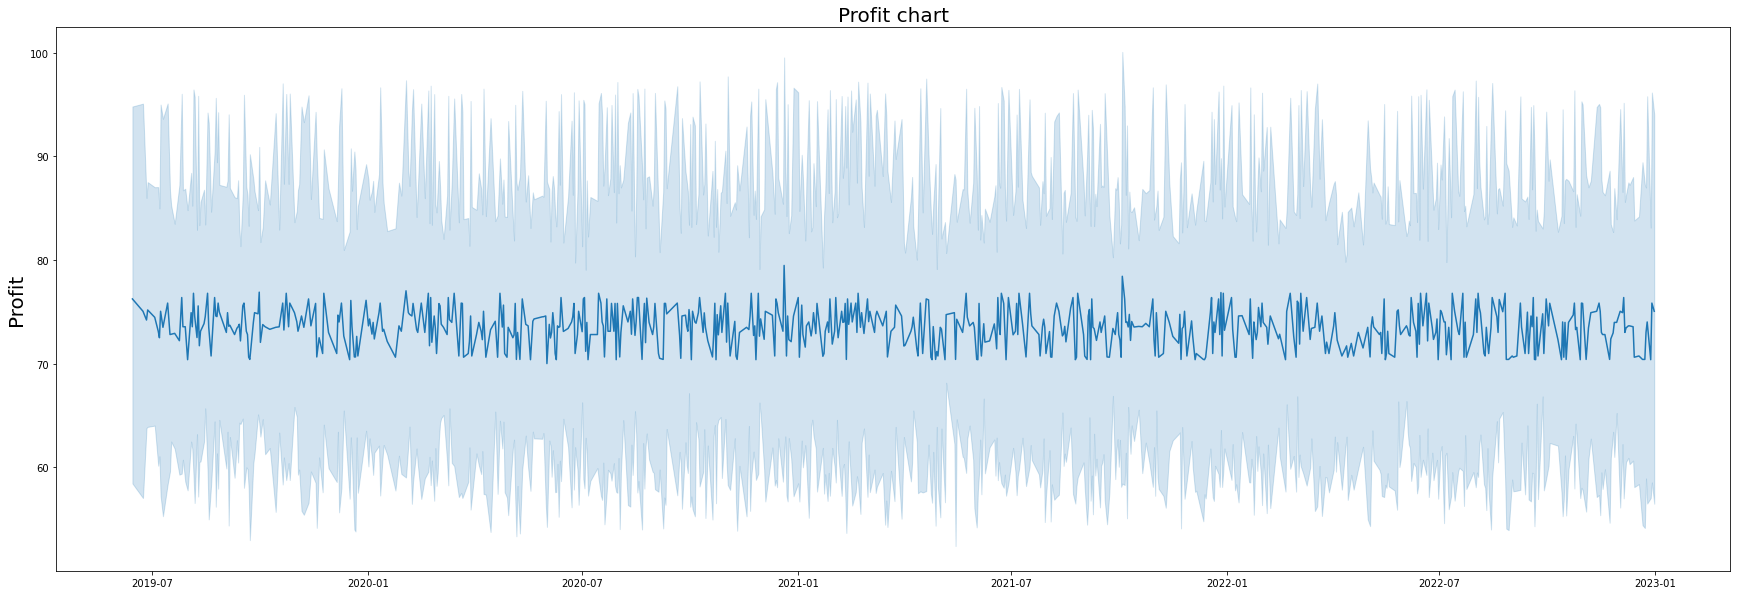

In [17]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df3["Order Date"], y=df3.Profit, data=df3, estimator='mean')
plt.title("Profit chart", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("Profit", fontsize=20)
plt.xlim('2019-06-14', '2022-12-31')
#plt.legend(['',''])
plt.show()

In the third task, you need to create a Bubble chart of sales for all customers. The chart should show the names of all customers. Once you roll over a bubble, the chart should show the name, profit and sale.

In [19]:
df4 = pd.DataFrame(df.groupby(["Customer Name"])["Sales","Profit"].sum())

<ipython-input-19-10c8cf18784b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df4 = pd.DataFrame(df.groupby(["Customer Name"])["Sales","Profit"].sum())


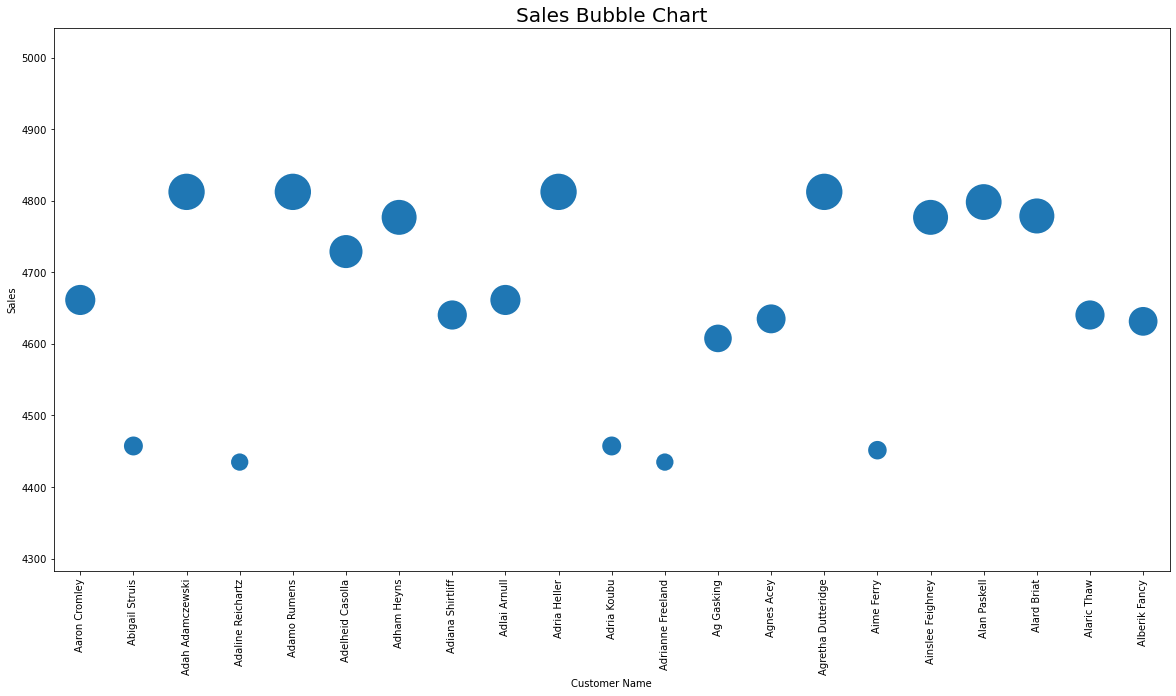

In [20]:
plt.figure(figsize=(20,10))

sns.scatterplot(x=df4.index, y=df4.Sales, size='Profit', data=df4, legend=False, sizes=(20,2000))
plt.title("Sales Bubble Chart", fontsize=20)
#plt.xlabel("Flight Number",fontsize=20)
#plt.ylabel("Launch Site",fontsize=20)
plt.xlim(-0.5, 20.5)
plt.xticks(rotation = 90)
plt.show()

In this task, you need to compare the sales of the three different cuisines sold at Little Lemon. Create a Bar chart that shows the sales of the Turkish, Italian and Greek cuisines.

In [22]:
df3["Year"] = df3["Order Date"].dt.year

<ipython-input-22-c91390c38dd3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Year"] = df3["Order Date"].dt.year


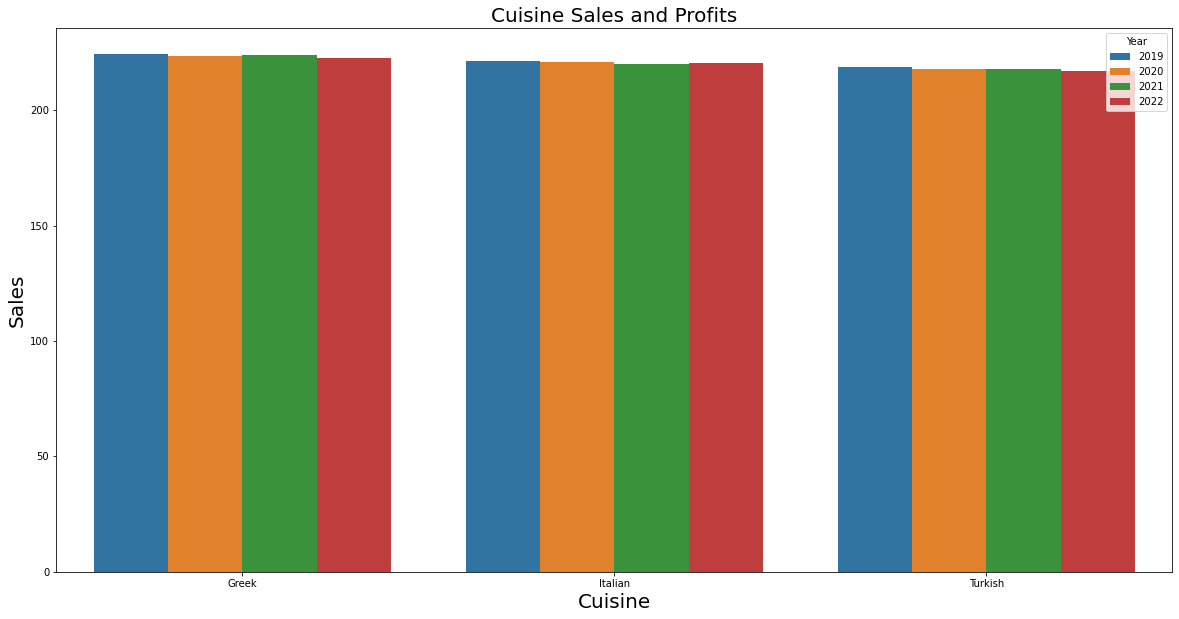

In [23]:
plt.figure(figsize=(20,10))


sns.barplot(y="Sales", x="Cuisine Name", hue="Year", data=df3, ci=None)
plt.xlabel("Cuisine",fontsize=20)
plt.ylabel("Sales",fontsize=20)
plt.title("Cuisine Sales and Profits", fontsize=20)

plt.show()

In this final task, you need to create an interactive dashboard that combines the Bar chart called Customers sales and the Sales Bubble Chart.



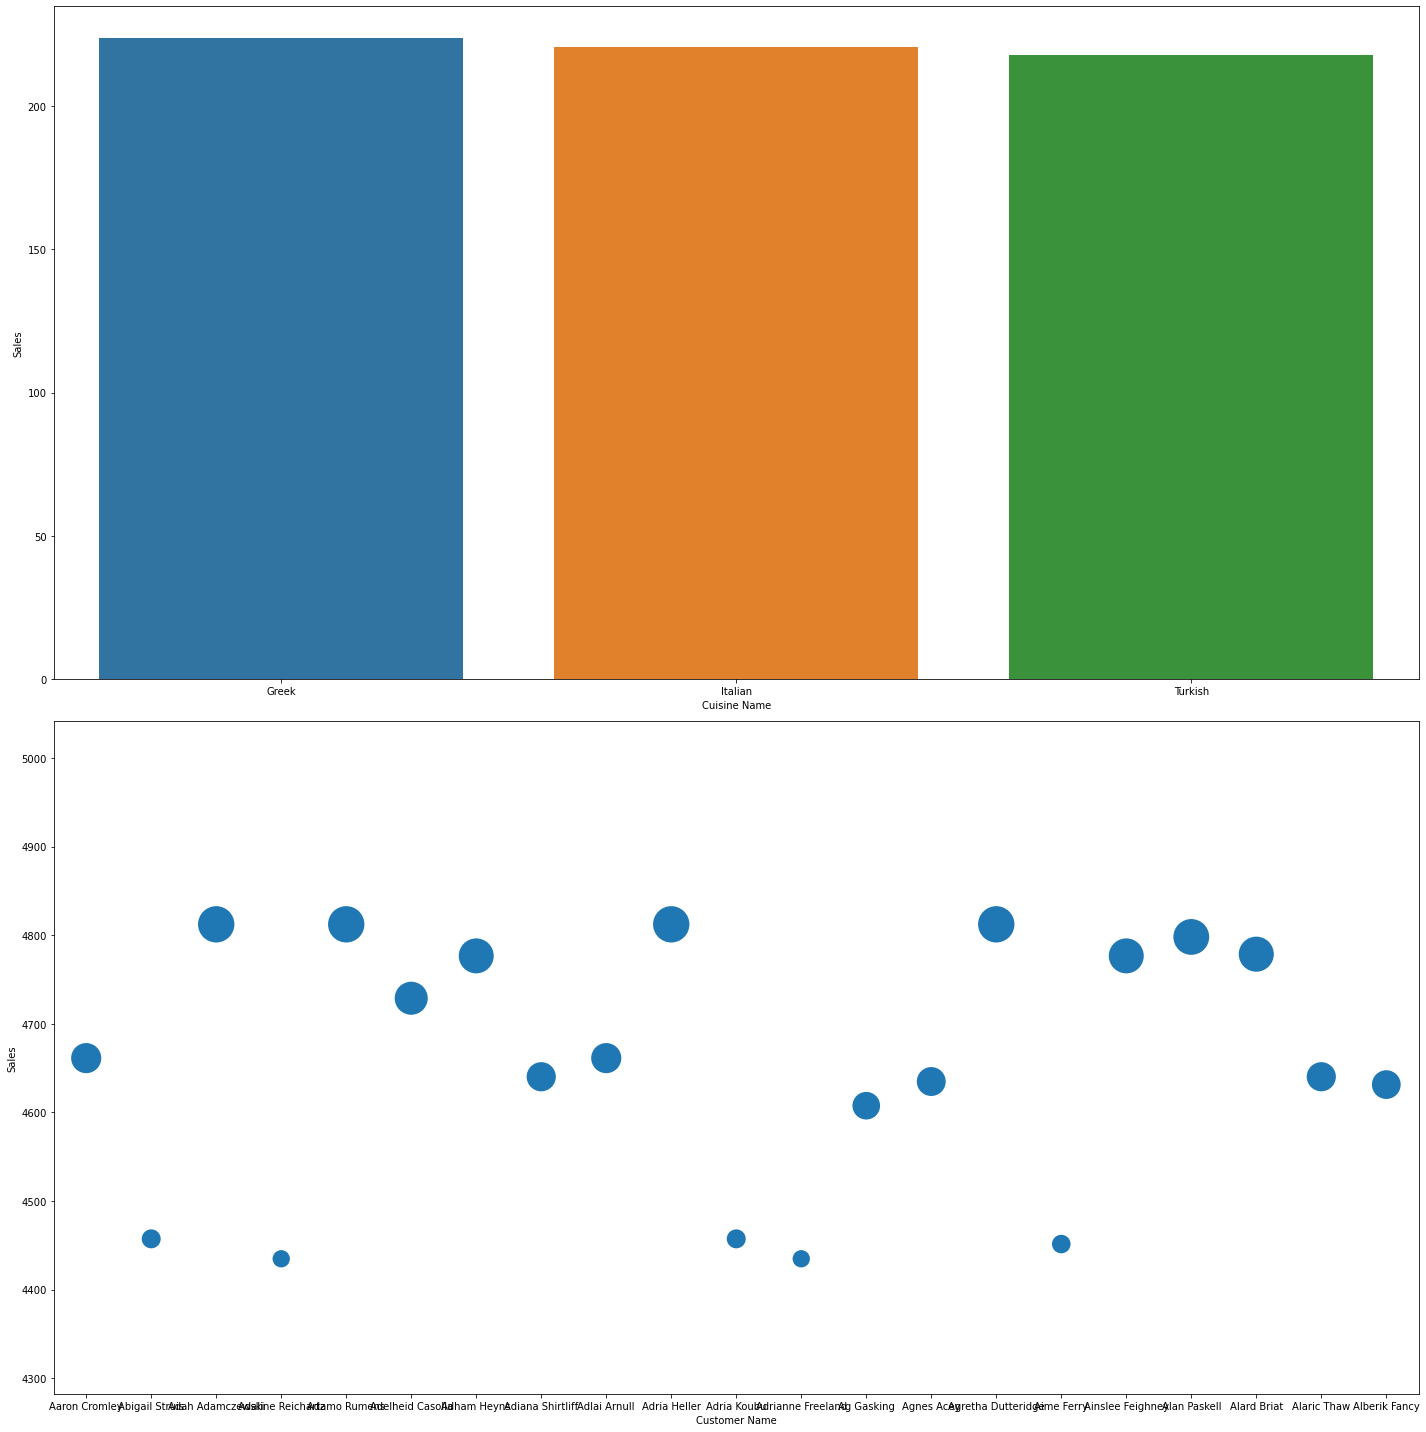

In [24]:
fig, ax = plt.subplots(2,1, sharex=False, figsize=(20,20))
#fig.suptitle('Main Title')


sns.barplot(x="Cuisine Name", y="Sales", data=df3, ci=None, ax=ax[0])
#ax[0].set_title('Title of the first chart')
#ax[0].tick_params('x', labelrotation=45)
ax[0].set_xlabel("Cuisine Name")
ax[0].set_ylabel("Sales")

sns.scatterplot(x=df4.index, y=df4.Sales, size='Profit', data=df4, legend=False, sizes=(20,2000), ax=ax[1])
#ax[1].set_title('Title of the second chart')
#ax[1].tick_params('x', labelrotation=45)
ax[1].set_xlabel("Customer Name")
ax[1].set_ylabel("Sales")
ax[1].set_xlim(-0.5, 20.5)

plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()